# pyTOF Documentation
The library has three main modules ITA, ITS and ITM. The ITM is still in development, but the two others can be used in order to read your images (.ITA files) or saved spectra (.ITS files).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pyTOF import Block,ITA
import os
%matplotlib inline

filename= os.getenv("HOMEPATH")+r"\Dropbox\TOF_SIMS\AuTi_big_40um_24_1.ita"

A = ITA.ITA(filename)

In [2]:
print("The ITA image has {N} scans and a size of {x}x{y} pixels".format(N=A.Nscan,x=A.sx,y=A.sy))

The ITA image has 50 scans and a size of 512x512 pixels


You can see all the channels you recorded and their mass (lower, average and upper mass limit)

In [3]:
A.showMassInt()

0 total  0.0 7500.0 15000.0
1 sum of rest  0.0 7500.0 15000.0
2  C- 11.927536439234666 12.001094203963476 12.075160584208614
3  CH- 12.932266882018785 13.009278773822166 13.08445932408019
4  O- 15.910193242920645 15.94743786240359 16.08062108063093
5  OH- 16.915810666882734 17.000033780017407 17.091773584202834
6  H_2O- 17.915747328515526 18.001566655988906 18.089239057341988
7  F- 18.906130323456473 18.995481172032395 19.091611950375203
8   20.576066921383116 20.697743579090687 20.838167203228547
9  C_2- 23.897526184461178 24.001390963151522 24.104252745245528
10  C_2H- 24.90356811385355 25.00940938126242 25.115485487016755
11  CN- 25.895862219818042 26.00308194723866 26.113469992680777
12  Si- 27.86468707310993 27.97777180439 28.084981783123098
13 S- / O2- S- 31.854601008060346 31.985130557675177 32.11105375878469
14 HS- / O2H-  32.86374961896726 32.99505470846801 33.123198646002194
15 Cl- / OF-  34.848865847411886 34.98361692855124 35.11954274009901
16  ^37Cl- 36.838349622103706 36.

## Show the sum of all scans for a specific mass
(e.g. 42u)

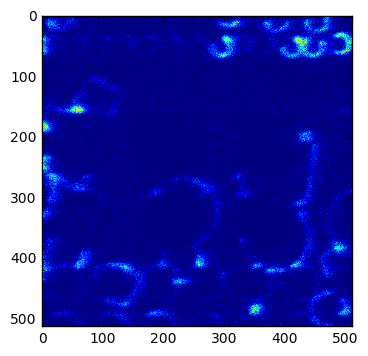

In [8]:
plt.imshow(A.getSumImageByMass(42));

## Show a cross section
(i.e. horizontal axis becomes the spacial axis along the profile and the vertical axis become time as each line a a new scan). This can be useful to check is there is drift or dirt on the surface which should be discarded.

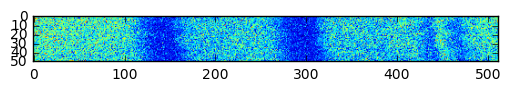

In [5]:
plt.imshow(A.getXsectionByMass(0,255,511,255,0));

## Get the image for a given mass selecting specific scans
The mass is in this example 42u and the scans are given as a list

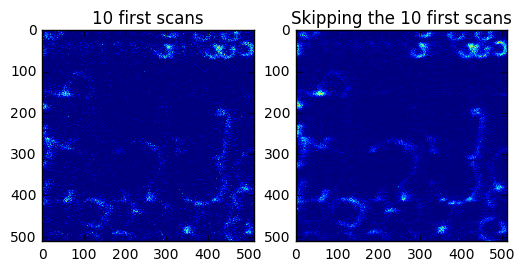

In [6]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(A.getSumImageByMass(42,range(0,10)));
ax[0].set_title("10 first scans")
ax[1].imshow(A.getSumImageByMass(42,range(10,A.Nscan)));
ax[1].set_title("Skipping the 10 first scans");

## Get Image by channel Name

List of the selected channels
	CN- () 2.6e+01 - 2.6e+01
	CNO- () 4.2e+01 - 4.2e+01
	CNAu- () 2.2e+02 - 2.2e+02


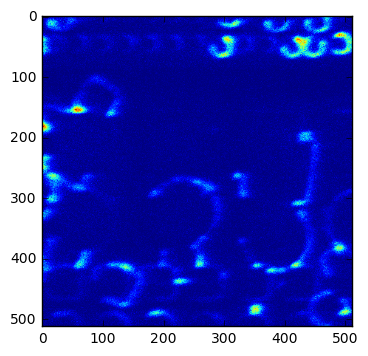

In [32]:
Z,ch = A.getSumImageByName('CN')
print("List of the selected channels")
for z in ch:
    print("\t{name} ({desc}) {lower:.2} - {upper:.2}".format(desc=z[b'desc']['utf16'],name=z[b'assign']['utf16'],lower=z[b'lmass']['float'],upper=z[b'umass']['float']))
plt.imshow(Z);